<a href="https://colab.research.google.com/github/Samanyu-dev/Network_Performance/blob/main/ML_Group18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas scikit-learn matplotlib tensorflow

In [ ]:
from google.colab import files

# This will prompt you to upload a file
uploaded = files.upload()

Saving Dataset1.csv to Dataset1.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    precision_score, recall_score, f1_score, roc_auc_score
)
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    LSTM, Dense, Dropout, Input, Conv1D, GlobalAveragePooling1D,
    LayerNormalization, MultiHeadAttention, Add, Flatten, Reshape
)
import matplotlib.pyplot as plt


data = pd.read_csv("/content/Dataset1.csv")
data = data.drop(columns=["Timestamp", "Locality", "Latitude", "Longitude"])

le = LabelEncoder()
data["Network Type"] = le.fit_transform(data["Network Type"])


for col in ["BB60C Measurement (dBm)", "srsRAN Measurement (dBm)", "BladeRFxA9 Measurement (dBm)"]:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].mean())

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

y = data_scaled[:, data.columns.get_loc("Data Throughput (Mbps)")]
X = np.delete(data_scaled, data.columns.get_loc("Data Throughput (Mbps)"), axis=1)
X_lstm = X.reshape((X.shape[0], 1, X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

lstm_model = Sequential([
    LSTM(64, input_shape=(1, X.shape[1]), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=5, batch_size=4, verbose=1)
y_pred = lstm_model.predict(X_test)
print("\n📈 LSTM Throughput Prediction:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

cnn_model = Sequential([
    Conv1D(64, kernel_size=1, activation='relu', input_shape=(1, X.shape[1])),
    Flatten(),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.fit(X_train, y_train, epochs=5, batch_size=4, verbose=1)
y_pred = cnn_model.predict(X_test)
print("\n📈 CNN Throughput Prediction:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

input_layer = Input(shape=(1, X.shape[1]))
x = LayerNormalization()(input_layer)
x = MultiHeadAttention(num_heads=2, key_dim=4)(x, x)
x = Add()([x, input_layer])
x = Flatten()(x)
output = Dense(1)(x)
transformer_model = Model(inputs=input_layer, outputs=output)
transformer_model.compile(optimizer='adam', loss='mse')
transformer_model.fit(X_train, y_train, epochs=5, batch_size=4, verbose=1)
y_pred = transformer_model.predict(X_test)
print("\n📈 Transformer Throughput Prediction:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

hybrid_model = Sequential([
    Conv1D(32, kernel_size=1, activation='relu', input_shape=(1, X.shape[1])),
    LSTM(32, return_sequences=False),
    Dense(1)
])
hybrid_model.compile(optimizer='adam', loss='mse')
hybrid_model.fit(X_train, y_train, epochs=5, batch_size=4, verbose=1)
y_pred = hybrid_model.predict(X_test)
print("\n📈 Hybrid Throughput Prediction:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0379
Epoch 2/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0224
Epoch 3/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0230
Epoch 4/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0234
Epoch 5/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.0223
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

📈 LSTM Throughput Prediction:
MSE: 0.02278064496434029
R² Score: 0.6681838454071448
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3366/3366 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0327
Epoch 2/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0207
Epoch 3/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0196
Epoch 4/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0191
Epoch 5/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0187
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📈 CNN Throughput Prediction:
MSE: 0.018797572480220053
R² Score: 0.7262001042626001
Epoch 1/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.1437
Epoch 2/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0299
Epoch 3/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0280
Epoch 4/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0288
Epoch 5/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0278
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

📈 Transformer Throughput Prediction:
MSE: 0.027487427945895072
R² Score: 0.5996262329300905
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3366/3366 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.0271
Epoch 2/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0196
Epoch 3/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0187
Epoch 4/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.0179
Epoch 5/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0177
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

📈 Hybrid Throughput Prediction:
MSE: 0.01811984363768543
R² Score: 0.7360717026628438


421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0231
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0177
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0254
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0181
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📊 Performance Metrics Table:
          Model   Dataset      RMSE       MAE  R-squared  \
0          LSTM  Dataset1  0.149924  0.087226   0.672602   
1           CNN  Dataset1  0.135584  0.067904   0.732239   
2   Transformer  Dataset1  0.159988  0.110419   0.627175   
3  Hybrid Model  Dataset1  0.134291  0.065500   0.737323   

   Training Time (hours)  Prediction Time (ms)  
0               0.000372            361.838579  
1               0.000368            246.953964  
2               0.000301            361.168861  
3               0.000368            269.451857  


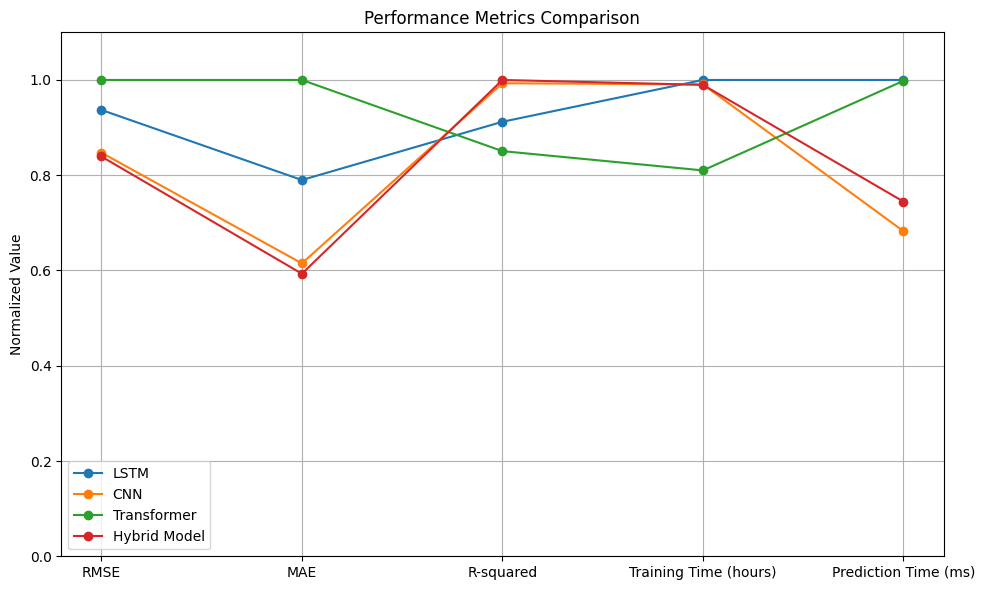

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

metrics = []

def evaluate_model(model, name):
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = (time.time() - start_train) / 3600
    start_pred = time.time()
    y_pred = model.predict(X_test)
    pred_time = (time.time() - start_pred) * 1000

    import numpy as np

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics.append({
        "Model": name,
        "Dataset": "Dataset1",
        "RMSE": rmse,
        "MAE": mae,
        "R-squared": r2,
        "Training Time (hours)": train_time,
        "Prediction Time (ms)": pred_time
    })

evaluate_model(lstm_model, "LSTM")
evaluate_model(cnn_model, "CNN")
evaluate_model(transformer_model, "Transformer")
evaluate_model(hybrid_model, "Hybrid Model")


df = pd.DataFrame(metrics)
print("\n📊 Performance Metrics Table:")
print(df)

df.to_csv("model_metrics.csv", index=False)


df_norm = df.copy()
cols_to_normalize = ["RMSE", "MAE", "R-squared", "Training Time (hours)", "Prediction Time (ms)"]
df_norm[cols_to_normalize] = df_norm[cols_to_normalize].apply(lambda x: x / x.max())


plt.figure(figsize=(10, 6))
for i, row in df_norm.iterrows():
    plt.plot(cols_to_normalize, row[cols_to_normalize], marker='o', label=row["Model"])

plt.title("Performance Metrics Comparison")
plt.ylabel("Normalized Value")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("performance_chart.png")
plt.show()


Epoch 1/5
379/379 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - loss: 7746.0068 - val_loss: 3189.2498
Epoch 2/5
379/379 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 3063.7351 - val_loss: 763.1705
Epoch 3/5
379/379 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 592.8979 - val_loss: 226.5762
Epoch 4/5
379/379 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 190.1437 - val_loss: 47.6571
Epoch 5/5
379/379 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 58.5558 - val_loss: 15.4841
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Epoch 1/5
379/379 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 4105.8730 - val_loss: 6335.3833
Epoch 2/5
379/379 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 97.6703 - val_loss: 104.1937
Epoch 3/5
379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 66.2665 - val_loss: 15.1670
Epoch 4/5
379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 56.3927 - val_loss: 12.6318
Epoch 5/5
379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 48.7013 - val_loss: 24.0249
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5
379/379 ━━━━━

<ipython-input-2-98c0a70c468d>:187: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


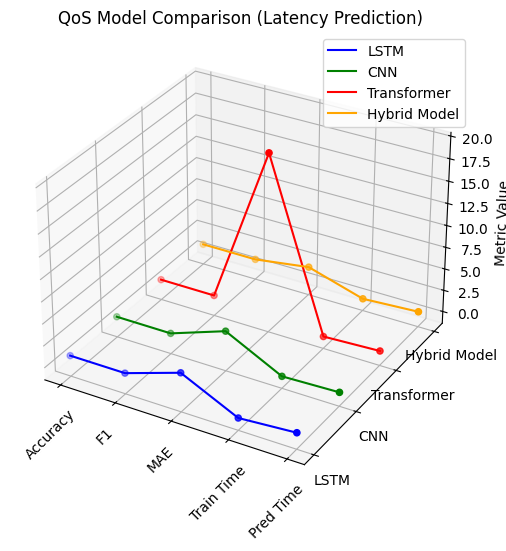

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
y_qos = data['Latency (ms)'].values

X_train_qos, X_test_qos, y_train_qos, y_test_qos = train_test_split(X, y_qos, test_size=0.2, random_state=42)

X_train_qos_rnn = X_train_qos.reshape((X_train_qos.shape[0], X_train_qos.shape[1], 1))
X_test_qos_rnn = X_test_qos.reshape((X_test_qos.shape[0], X_test_qos.shape[1], 1))

# Helper to binarize/regress labels for classification metrics
def to_class(preds, true_vals):
    pred_class = (preds.flatten() > np.median(true_vals)).astype(int)
    true_class = (true_vals > np.median(true_vals)).astype(int)
    return pred_class, true_class

# Store metrics
performance_metrics = {}

# --------------------- LSTM ---------------------
start_train = time.time()
model_lstm_qos = Sequential([
    Input(shape=(X_train_qos_rnn.shape[1], 1)),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1)
])
model_lstm_qos.compile(optimizer='adam', loss='mse')
model_lstm_qos.fit(X_train_qos_rnn, y_train_qos, epochs=5, batch_size=32,
                   validation_split=0.1, callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
                   verbose=1)
train_time = time.time() - start_train

start_pred = time.time()
pred_lstm_qos = model_lstm_qos.predict(X_test_qos_rnn)
pred_time = (time.time() - start_pred) * 1000 / len(X_test_qos_rnn)

pred_class, true_class = to_class(pred_lstm_qos, y_test_qos)
performance_metrics['LSTM'] = {
    'Accuracy': accuracy_score(true_class, pred_class),
    'F1-Score': f1_score(true_class, pred_class),
    'MAE': mean_absolute_error(y_test_qos, pred_lstm_qos),
    'TrainTime': round(train_time / 3600, 2),  # in hours
    'PredTime': round(pred_time, 2)  # in ms per sample
}

# --------------------- CNN ---------------------
start_train = time.time()
model_cnn_qos = Sequential([
    Input(shape=(X_train_qos_rnn.shape[1], 1)),
    Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(32, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])
model_cnn_qos.compile(optimizer='adam', loss='mse')
model_cnn_qos.fit(X_train_qos_rnn, y_train_qos, epochs=5, batch_size=32,
                  validation_split=0.1, callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
                  verbose=1)
train_time = time.time() - start_train

start_pred = time.time()
pred_cnn_qos = model_cnn_qos.predict(X_test_qos_rnn)
pred_time = (time.time() - start_pred) * 1000 / len(X_test_qos_rnn)

pred_class, true_class = to_class(pred_cnn_qos, y_test_qos)
performance_metrics['CNN'] = {
    'Accuracy': accuracy_score(true_class, pred_class),
    'F1-Score': f1_score(true_class, pred_class),
    'MAE': mean_absolute_error(y_test_qos, pred_cnn_qos),
    'TrainTime': round(train_time / 3600, 2),
    'PredTime': round(pred_time, 2)
}

# --------------------- Transformer ---------------------
def transformer_qos_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(64)(inputs)
    x = LayerNormalization()(x)
    attention = MultiHeadAttention(num_heads=4, key_dim=16)(x, x)
    attention = Dropout(0.2)(attention)
    x = Add()([x, attention])
    x = LayerNormalization()(x)
    ff = Dense(64, activation='relu')(x)
    ff = Dense(64)(ff)
    x = Add()([x, ff])
    x = LayerNormalization()(x)
    x = GlobalAveragePooling1D()(x)
    output = Dense(1)(x)
    return Model(inputs, output)

start_train = time.time()
model_transformer_qos = transformer_qos_model((X_train_qos_rnn.shape[1], 1))
model_transformer_qos.compile(optimizer='adam', loss='mse')
model_transformer_qos.fit(X_train_qos_rnn, y_train_qos, epochs=5, batch_size=32,
                          validation_split=0.1, callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
                          verbose=1)
train_time = time.time() - start_train

start_pred = time.time()
pred_trans_qos = model_transformer_qos.predict(X_test_qos_rnn)
pred_time = (time.time() - start_pred) * 1000 / len(X_test_qos_rnn)

pred_class, true_class = to_class(pred_trans_qos, y_test_qos)
performance_metrics['Transformer'] = {
    'Accuracy': accuracy_score(true_class, pred_class),
    'F1-Score': f1_score(true_class, pred_class),
    'MAE': mean_absolute_error(y_test_qos, pred_trans_qos),
    'TrainTime': round(train_time / 3600, 2),
    'PredTime': round(pred_time, 2)
}

# --------------------- Hybrid Model ---------------------
start_train = time.time()
model_hybrid_qos = Sequential([
    Input(shape=(X_train_qos_rnn.shape[1], 1)),
    Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(64, activation='relu'),
    Dense(1)
])
model_hybrid_qos.compile(optimizer='adam', loss='mse')
model_hybrid_qos.fit(X_train_qos_rnn, y_train_qos, epochs=5, batch_size=32,
                     validation_split=0.1, callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
                     verbose=1)
train_time = time.time() - start_train

start_pred = time.time()
pred_hybrid_qos = model_hybrid_qos.predict(X_test_qos_rnn)
pred_time = (time.time() - start_pred) * 1000 / len(X_test_qos_rnn)

pred_class, true_class = to_class(pred_hybrid_qos, y_test_qos)
performance_metrics['Hybrid Model'] = {
    'Accuracy': accuracy_score(true_class, pred_class),
    'F1-Score': f1_score(true_class, pred_class),
    'MAE': mean_absolute_error(y_test_qos, pred_hybrid_qos),
    'TrainTime': round(train_time / 3600, 2),
    'PredTime': round(pred_time, 2)
}

# ------------------ Print Table ------------------
print(f"\n{'Model':<15}{'Accuracy':<10}{'F1-Score':<10}{'MAE':<10}{'Training Time (hrs)':<22}{'Prediction Time (ms)':<22}")
for model, metrics in performance_metrics.items():
    print(f"{model:<15}{metrics['Accuracy']:<10.2f}{metrics['F1-Score']:<10.2f}{metrics['MAE']:<10.2f}{metrics['TrainTime']:<22}{metrics['PredTime']:<22}")

# ------------------ 3D Plot ------------------
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

metrics_names = ["Accuracy", "F1-Score", "MAE", "TrainTime", "PredTime"]
x = np.arange(len(metrics_names))
models = list(performance_metrics.keys())
colors = ['blue', 'green', 'red', 'orange']

for idx, model in enumerate(models):
    y = [idx] * len(metrics_names)
    z = [performance_metrics[model][metric] for metric in metrics_names]
    ax.plot(x, y, z, label=model, color=colors[idx])
    ax.scatter(x, y, z, color=colors[idx])

ax.set_xticks(x)
ax.set_xticklabels(["Accuracy", "F1", "MAE", "Train Time", "Pred Time"], rotation=45)
ax.set_yticks(range(len(models)))
ax.set_yticklabels(models)
ax.set_zlabel('Metric Value')
ax.set_title('QoS Model Comparison (Latency Prediction)')
ax.legend()
plt.tight_layout()
plt.show()


### **improvements start**

In [ ]:
!pip install keras-tcn --quiet

In [ ]:
# === GRU Model ===
from tensorflow.keras.layers import GRU

gru_model = Sequential([
    GRU(64, input_shape=(1, X.shape[1]), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=5, batch_size=4, verbose=1)
y_pred = gru_model.predict(X_test)
print("\n📈 GRU Throughput Prediction:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))




from tcn import TCN

tcn_model = Sequential([
    TCN(input_shape=(1, X.shape[1])),
    Dense(1)
])
tcn_model.compile(optimizer='adam', loss='mse')
tcn_model.fit(X_train, y_train, epochs=5, batch_size=4, verbose=1)
y_pred = tcn_model.predict(X_test)
print("\n📈 TCN Throughput Prediction:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 52s 11ms/step - loss: 0.0361
Epoch 2/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0245
Epoch 3/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.0231
Epoch 4/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0234
Epoch 5/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.0226
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

📈 GRU Throughput Prediction:
MSE: 0.024578236129165515
R² Score: 0.642000662763454


/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Epoch 1/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - loss: 0.0373
Epoch 2/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 0.0194
Epoch 3/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - loss: 0.0176
Epoch 4/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 0.0178
Epoch 5/5
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0177
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step

📈 TCN Throughput Prediction:
MSE: 0.018003230395472403
R² Score: 0.7377702567497146


In [ ]:
# === GRU Model for QoS Prediction ===
from tensorflow.keras.layers import GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score

gru_qos_model = Sequential([
    GRU(64, input_shape=(X_train_qos_rnn.shape[1], 1), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
gru_qos_model.compile(optimizer='adam', loss='mse')
gru_qos_model.fit(X_train_qos_rnn, y_train_qos, epochs=5, batch_size=32, verbose=1)

y_gru_qos_pred = gru_qos_model.predict(X_test_qos_rnn)
print("\n📈 GRU QoS (Latency) Prediction:")
print("MSE:", mean_squared_error(y_test_qos, y_gru_qos_pred))
print("R² Score:", r2_score(y_test_qos, y_gru_qos_pred))


from tcn import TCN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tcn_qos_model = Sequential([
    TCN(input_shape=(X_train_qos_rnn.shape[1], 1)),
    Dense(1)
])
tcn_qos_model.compile(optimizer='adam', loss='mse')
tcn_qos_model.fit(X_train_qos_rnn, y_train_qos, epochs=5, batch_size=32, verbose=1)

y_tcn_qos_pred = tcn_qos_model.predict(X_test_qos_rnn)
print("\n📈 TCN QoS (Latency) Prediction:")
print("MSE:", mean_squared_error(y_test_qos, y_tcn_qos_pred))
print("R² Score:", r2_score(y_test_qos, y_tcn_qos_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 11028.0156
Epoch 2/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 6483.5420
Epoch 3/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4509.7524
Epoch 4/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3635.0745
Epoch 5/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 3351.9158
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

📈 GRU QoS (Latency) Prediction:
MSE: 3225.8856282721695
R² Score: -0.016867476504809797


/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Epoch 1/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - loss: 1557.4160
Epoch 2/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.5462
Epoch 3/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 0.2257
Epoch 4/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.1242
Epoch 5/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - loss: 0.1088
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step

📈 TCN QoS (Latency) Prediction:
MSE: 0.10973901512434295
R² Score: 0.9999654079380851


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X_all_seq = X.reshape((X.shape[0], 1, X.shape[1]))
X_all_flat = X

y_gru_all_preds = gru_model.predict(X_all_seq).flatten()


rf_surrogate_full = RandomForestRegressor(n_estimators=100, random_state=42)
rf_surrogate_full.fit(X_all_flat, y_gru_all_preds)


print("📊 R² of RF Surrogate vs GRU:", r2_score(y_gru_all_preds, rf_surrogate_full.predict(X_all_flat)))


526/526 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
📊 R² of RF Surrogate vs GRU: 0.9999666332012415


## SHAP

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

def simple_shap_analysis(model, model_name, X_train, X_test, y_test, feature_names, is_sequence=True):
    """
    Simplified SHAP analysis using a Random Forest surrogate model for regression.
    Works with deep models by using their predictions and training a surrogate model.
    """
    print(f"\n=== SHAP Analysis for {model_name} ===")

    if is_sequence:
        X_train_seq = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_test_seq = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    else:
        X_train_seq = X_train
        X_test_seq = X_test

    print("Getting predictions from deep learning model...")
    y_train_pred = model.predict(X_train_seq).ravel()
    y_test_pred = model.predict(X_test_seq).ravel()

    print("Training surrogate Random Forest Regressor model...")
    surrogate_model = RandomForestRegressor(n_estimators=100, random_state=42)
    surrogate_model.fit(X_train, y_train_pred)

    surrogate_pred = surrogate_model.predict(X_test)
    print(f"Surrogate R² score: {r2_score(y_test_pred, surrogate_pred):.4f}")

    importances = surrogate_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance': [importances[i] for i in indices]
    })

    plt.figure(figsize=(12, 8))
    plt.title(f"Feature Importances - {model_name}")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(min(10, len(feature_names))), [feature_names[i] for i in indices[:10]], rotation=45)
    plt.tight_layout()
    plt.show()

    print("\nPerforming SHAP analysis on surrogate model...")
    sample_size = min(500, X_test.shape[0])
    X_test_sample = X_test[:sample_size]

    try:
        explainer = shap.TreeExplainer(surrogate_model)
        shap_values = explainer.shap_values(X_test_sample)

        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, show=False)
        plt.title(f'SHAP Summary Plot - {model_name}')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"SHAP error: {e}")

    return importance_df



=== SHAP Analysis for GRU ===
Getting predictions from deep learning model...
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Training surrogate Random Forest Regressor model...
Surrogate R² score: 0.9998


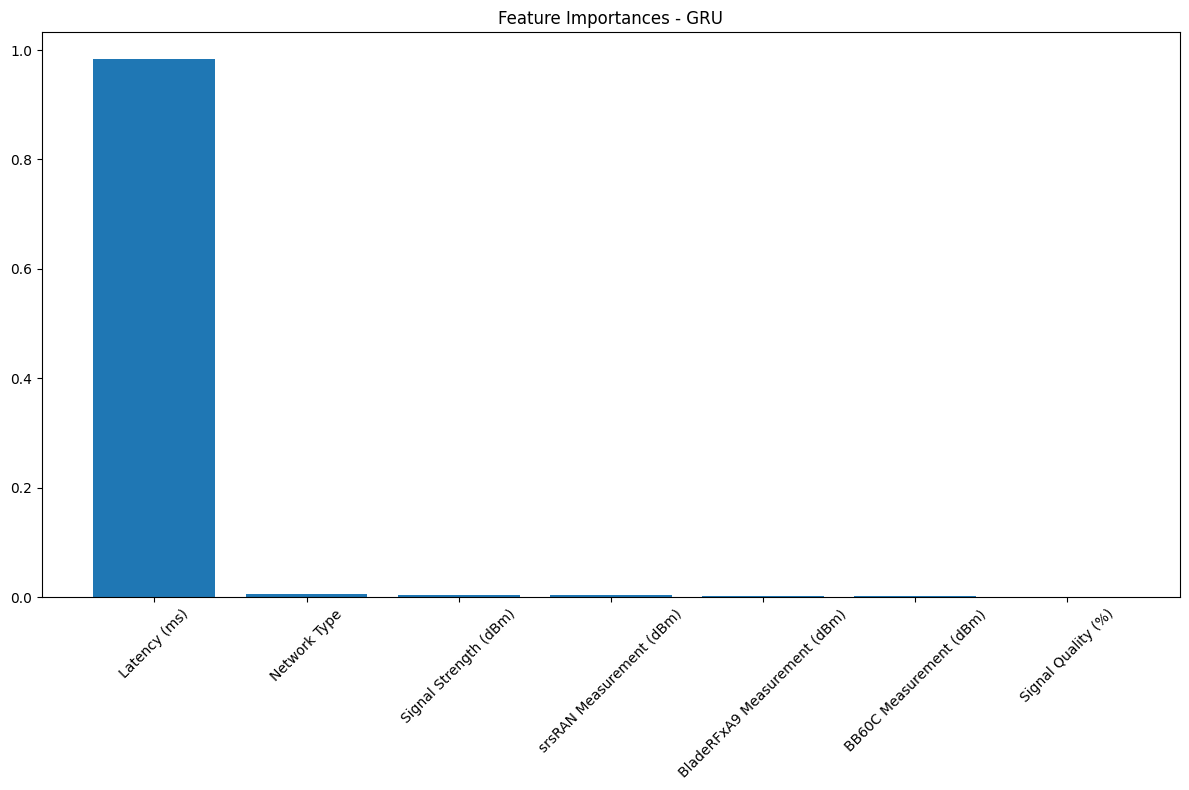


Performing SHAP analysis on surrogate model...


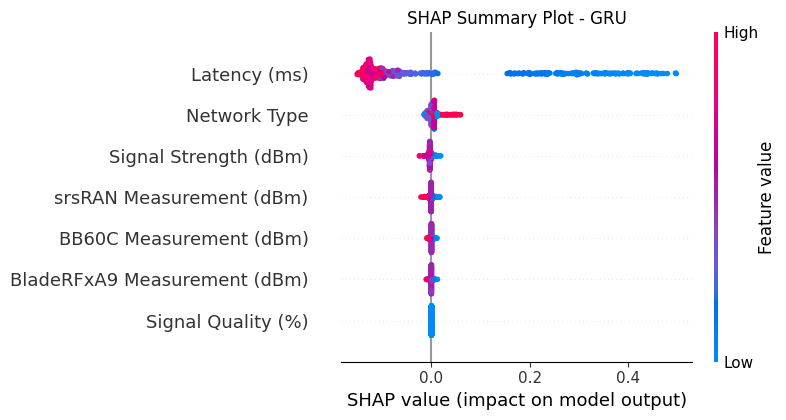

In [ ]:
importance_df = simple_shap_analysis(
    model=gru_model,
    model_name="GRU",
    X_train=X_train,
    X_test=X_test,
    y_test=y_test,
    feature_names=data.drop(columns=["Data Throughput (Mbps)"]).columns.tolist(),
    is_sequence=True
)



=== SHAP Analysis for TCN ===
Getting predictions from deep learning model...
421/421 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Training surrogate Random Forest Regressor model...
Surrogate R² score: 1.0000


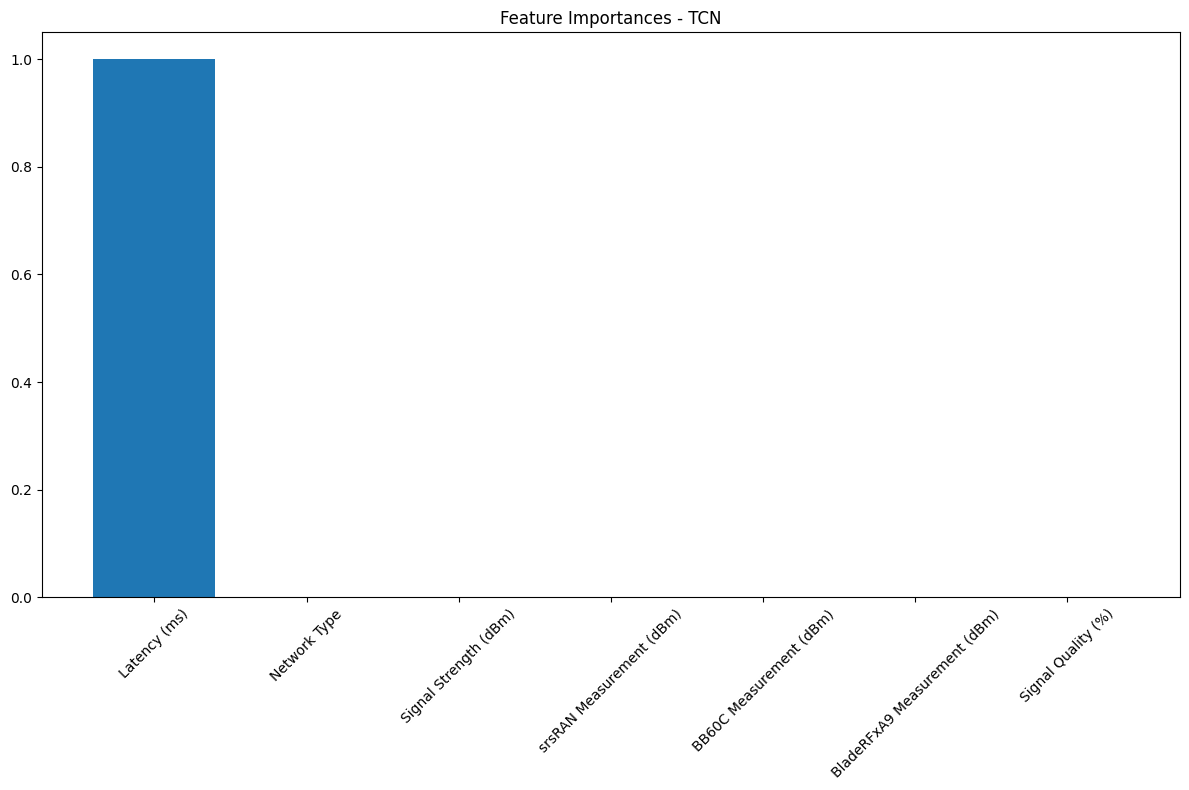


Performing SHAP analysis on surrogate model...


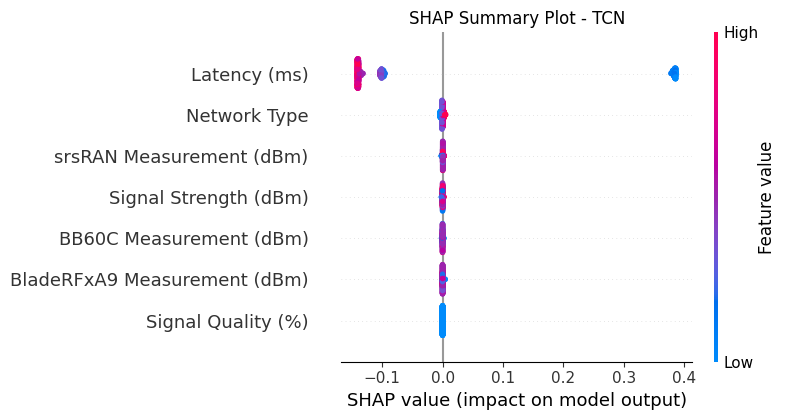

In [ ]:
importance_df = simple_shap_analysis(
    model=tcn_model,
    model_name="TCN",
    X_train=X_train,
    X_test=X_test,
    y_test=y_test,
    feature_names=data.drop(columns=["Data Throughput (Mbps)"]).columns.tolist(),
    is_sequence=True
)
